In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
url = 'data/gender-pay-gap-uk-gov/2018.csv.gz'
data = pd.read_csv(url, compression='gzip')
data.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nD...",00226143,85310,19.6,32.5,NaN,NaN,0.0,0.0,...,55.1,53.3,46.7,https://www.bryanston.co.uk/employment,Michael McGovern (Chief Operating Officer),500 to 999,BRYANSTON SCHOOL INCORPORATED,False,05/04/2019 00:00:00,03/04/2019 13:43:34
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,...,88.4,20.3,79.7,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2019 00:00:00,01/04/2019 12:37:21
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam,\r\nGround Floo...",03951948,61900,7.7,12.7,11.3,10.9,67.0,52.0,...,50.0,56.0,44.0,NaN,Michael Graham (CEO),1000 to 4999,118 LIMITED,False,05/04/2019 00:00:00,06/03/2019 13:26:24
3,123 EMPLOYEES LTD,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",10530651,78300,30.0,29.0,-10.0,69.0,46.0,74.0,...,83.0,25.0,75.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,False,05/04/2019 00:00:00,03/04/2019 15:43:17
4,1509 GROUP,"Royal Grammar School,\r\nHigh Street,\r\nGuild...",04104101,"85200,\r\n85310",13.4,12.7,0.0,0.0,0.0,0.0,...,51.6,61.3,38.7,https://www.rgs-guildford.co.uk,Kate Perceval (Bursar),250 to 499,1509 GROUP,False,05/04/2019 00:00:00,18/03/2019 14:03:16


In [84]:
data.shape

(10817, 25)

In [85]:
#Columns that have a single value for all rows do not contain any information for modeling.

print(data.nunique())

EmployerName                 10817
Address                       9313
CompanyNumber                 9478
SicCodes                      2004
DiffMeanHourlyPercent          851
DiffMedianHourlyPercent        891
DiffMeanBonusPercent          1712
DiffMedianBonusPercent        1761
MaleBonusPercent               978
FemaleBonusPercent             974
MaleLowerQuartile              977
FemaleLowerQuartile            977
MaleLowerMiddleQuartile        982
FemaleLowerMiddleQuartile      982
MaleUpperMiddleQuartile        976
FemaleUpperMiddleQuartile      976
MaleTopQuartile                946
FemaleTopQuartile              946
CompanyLinkToGPGInfo          6244
ResponsiblePerson             7509
EmployerSize                     7
CurrentName                  10816
SubmittedAfterTheDeadline        2
DueDate                          2
DateSubmitted                10695
dtype: int64


In [86]:
# drop columns with 2 unique values and the ones that make no difference like ResponsiblePerson
del_cols = ["ResponsiblePerson","SubmittedAfterTheDeadline","DueDate","DateSubmitted"]
data.drop(del_cols, axis=1, inplace=True)
data.shape

(10817, 21)

In [87]:
# calculate duplicates
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())

False


No duplicate rows!

if there were, drop with: data.drop_duplicates(inplace=True)

In [88]:
data.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10817.000000,10817.000000,9068.000000,9068.000000,10817.000000,10817.000000,10817.000000,10817.000000,10817.00000,10817.00000,10817.000000,10817.000000,10817.000000,10817.000000
mean,14.182555,11.882851,18.401390,-1.033855,35.706749,34.378941,46.115568,53.884432,50.17099,49.82901,54.384718,45.615282,60.253000,39.747000
std,14.243119,15.512442,219.025483,295.383196,36.675086,36.375891,24.113495,24.113495,26.19021,26.19021,26.318576,26.318576,24.487098,24.487098
min,-98.700000,-92.300000,-13934.000000,-14490.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.900000,0.900000,0.000000,0.000000,0.700000,0.300000,27.000000,35.500000,29.00000,28.00000,33.000000,22.000000,41.000000,18.000000
50%,13.100000,9.500000,32.050000,15.550000,19.200000,17.100000,44.600000,55.400000,48.00000,52.00000,53.000000,47.000000,62.000000,38.000000
75%,22.400000,21.000000,56.600000,43.000000,75.100000,71.900000,64.500000,73.000000,72.00000,71.00000,78.000000,67.000000,82.000000,59.000000
max,100.000000,100.000000,134.200000,4000.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000


From count we see the DiffMeanBonusPercent and DiffMedianBonusPercent have missing values.

The max and min values are also crazy.

In [89]:
# clean up - dropping all with values bigger than 100
data = data[(data.DiffMeanBonusPercent>-100) & 
     (data.DiffMeanBonusPercent<100) &
     (data.DiffMedianBonusPercent>-100) &
     (data.DiffMedianBonusPercent<100)]

In [90]:
data.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000,8327.000000
mean,15.389972,12.241516,30.675345,20.775513,43.953393,42.504455,48.196734,51.803266,52.528738,47.471262,57.030359,42.969641,63.331380,36.668620
std,13.975247,14.998025,33.778702,32.482107,36.305775,36.227367,23.042605,23.042605,25.202423,25.202423,25.421977,25.421977,23.186243,23.186243
min,-98.700000,-92.300000,-99.600000,-99.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.500000,3.500000,0.000000,7.050000,5.600000,30.250000,34.200000,33.000000,26.400000,37.800000,20.300000,46.300000,16.300000
50%,14.300000,10.200000,33.100000,17.200000,38.200000,35.900000,47.000000,53.000000,51.700000,48.300000,57.000000,43.000000,66.400000,33.600000
75%,23.500000,21.200000,56.000000,43.000000,82.000000,80.350000,65.800000,69.750000,73.600000,67.000000,79.700000,62.200000,83.700000,53.700000
max,91.700000,79.300000,99.700000,99.700000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [91]:
new_data = data[['DiffMeanHourlyPercent','DiffMedianHourlyPercent','DiffMeanBonusPercent','DiffMedianBonusPercent','MaleBonusPercent',
       'FemaleBonusPercent','MaleLowerQuartile','FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize']]
new_data.dropna(axis=0, inplace = True) #droping missing values everywhere
print(new_data.shape)

(8327, 15)


/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
# https://www.datacamp.com/community/tutorials/categorical-data
new_data['EmployerSize'] = new_data['EmployerSize'].astype('category')
print(new_data['EmployerSize'].unique())
new_data['EmployerSize'] = new_data['EmployerSize'].cat.codes
print(new_data['EmployerSize'].unique())

[250 to 499, 1000 to 4999, 500 to 999, 5000 to 19,999, Less than 250, 20,000 or more, Not Provided]
Categories (7, object): [250 to 499, 1000 to 4999, 500 to 999, 5000 to 19,999, Less than 250, 20,000 or more, Not Provided]
[2 0 3 4 5 1 6]


/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/shivangi/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [133]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# https://www.kaggle.com/learn/intro-to-machine-learning

In [135]:
def decision_tree(train_X, val_X, train_y, val_y):
    # Define model. Specify a number for random_state to ensure same results each run
    model = DecisionTreeRegressor(random_state=1)

    # Fit model
    model.fit(train_X, train_y)

    # get predicted prices on validation data
    val_predictions = model.predict(val_X)
    print(mean_absolute_error(val_y, val_predictions))
    return model

In [136]:
def random_forest(train_X, val_X, train_y, val_y):
    forest_model = RandomForestRegressor(random_state=1)
    forest_model.fit(train_X, train_y)
    new_preds = forest_model.predict(val_X)
    print(mean_absolute_error(val_y, new_preds))
    return forest_model

In [137]:
#predict mean hourly rate
y = new_data.DiffMeanHourlyPercent
features = ['DiffMeanBonusPercent','DiffMedianBonusPercent','MaleBonusPercent',
       'FemaleBonusPercent','MaleLowerQuartile','FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize']
X = new_data[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
decision_tree_model = decision_tree(train_X, val_X, train_y, val_y)
forest_model = random_forest(train_X, val_X, train_y, val_y)

8.88991354466859
5.881345821325648


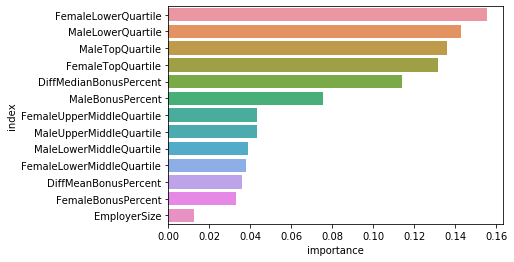

In [127]:
feature_importances = pd.DataFrame(forest_model.feature_importances_,
    index = train_X.columns,
    columns=['importance']).sort_values('importance', ascending=False)
sns.barplot(data=feature_importances.reset_index(),x='importance',y='index',orient='h')

In [142]:
#predict median hourly rate
y = new_data.DiffMedianHourlyPercent
features = ['DiffMedianBonusPercent','DiffMeanBonusPercent','MaleBonusPercent',
       'FemaleBonusPercent','MaleLowerQuartile','FemaleLowerQuartile',
       'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
       'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
       'MaleTopQuartile', 'FemaleTopQuartile','EmployerSize']
X = new_data[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
median_decision_tree_model = decision_tree(train_X, val_X, train_y, val_y)
median_forest_model = random_forest(train_X, val_X, train_y, val_y)

9.12463976945245
6.417348222862632


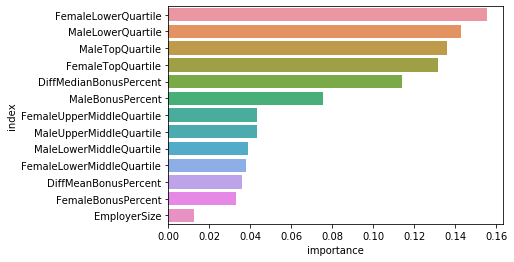

In [141]:
feature_importances1 = pd.DataFrame(median_forest_model.feature_importances_,
    index = train_X.columns,
    columns=['importance']).sort_values('importance', ascending=False)
sns.barplot(data=feature_importances1.reset_index(),x='importance',y='index',orient='h')